# AIR BNB HOST'S SUCCESS RATE INTERPRETATION

#INTRODUCTION

  We will be studying New York City Airbnb Open Data which gives us information about the number of rental houses that one host owns, the price of houses per night and where they are located. The main focus of this project is to compare the rate of success of different hosts in terms of how wisely they choose their houses based on the number, price and location. We will be observing the relationship between how many houses each host owns and the distribution of renting rate. Distinct locations influence house renting.
  

We are planning to focus on different types of queries in order to analyze according to which factors the hosts choose their rental houses and how we can classify the hosts accordingly their rate of success. We decided that the revenue of the hosts will be the prime aspect to define their success.







#UTILIZED DATASETS

1.   New York City Airbnb Open Data from
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv
2.   New York City Museums Open Data from
https://data.cityofnewyork.us/Recreation/New-York-City-Museums/ekax-ky3z


# DATA PREPARATION


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
#Libraries that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
filename = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, filename))

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

We didn't drop NaN values, because the columns we will use for this project doesn't contain NaN values.

# DATA EXPLORATION


## Room Type Choice



In order to understand the room type preference, we should analyze the number of different room types. 

###**Host**'**s** **Preferences**

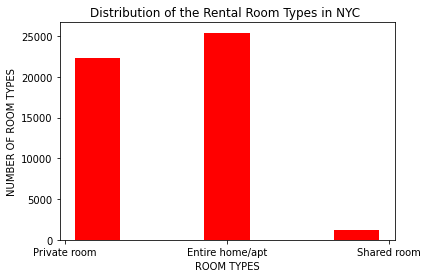

In [ ]:
plt.hist(df['room_type'],bins=5,rwidth=0.7,align='mid',color='red')
plt.xlabel("ROOM TYPES")
plt.ylabel("NUMBER OF ROOM TYPES")
plt.title("Distribution of the Rental Room Types in NYC ")
plt.show()

The result shows us that most of the hosts' preference is to rent an entire room or a private room. The shared rooms are not preferred.

###**Creating a New 'Rented Days' Column**

Now we will create a new column called 'rented_days'. This column will give us the information about how many days is that house is rented in one year.We are assuming 'availability_365' column is the amount of days which that house is not rented.

In [ ]:
rented_days = []
for i in df["availability_365"]:
  num = abs(365-i)
  rented_days.append(num)
df["rented_days"] = rented_days
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rented_days
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0


###**Renter's** **Preferences**

Now, we will visualize the rented day average by room choice in order to understand which type of room is preferred by the renters.

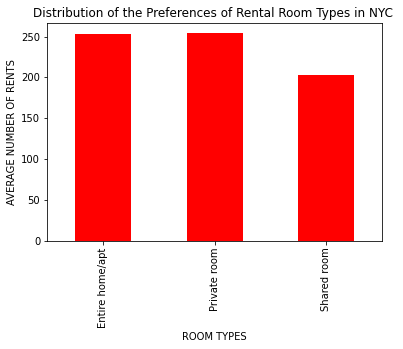

In [ ]:
df_copy1=df.copy()
a=df_copy1.groupby(['room_type'])['rented_days'].mean()

df_a = pd.DataFrame(a) 
a.plot(kind='bar', color='red')
plt.xlabel("ROOM TYPES")
plt.ylabel("AVERAGE NUMBER OF RENTS")
plt.title("Distribution of the Preferences of Rental Room Types in NYC ")
plt.show()


Similar to hosts, renters are prefering entire home or private rooms, as well. But still, the average rental days of shared rooms is not low even though the number of the shared rooms is lower than the others. So it would be wisely for hosts to rent more shared rooms.

##Price Analysis and House Distribution

###**Price Distribution**

We want to plot the distrubution of the price in order to understand the average rental price in NYC.

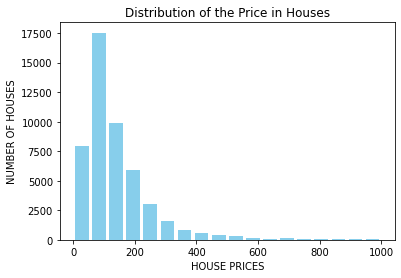

In [ ]:

plt.hist(df['price'],bins=18,rwidth= 0.8, range=[0, 1000],align='mid',color='skyblue')
plt.xlabel("HOUSE PRICES")
plt.ylabel("NUMBER OF HOUSES")
plt.title("Distribution of the Price in Houses")

plt.show()

It shows that the average price in house renting is from 50 to 100 dollars. There also exists very cheap or extremely expensive houses.

### **Price and Rented Days Correlation**


We want to analyse whether there exists a correlation between price and rented days.

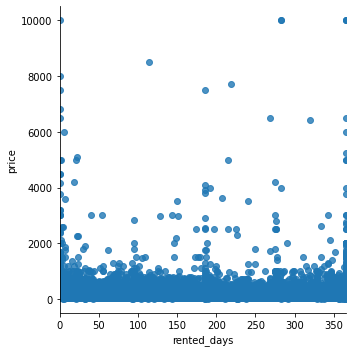

In [ ]:
import seaborn as sns
df8= df.copy()
sns.lmplot(x="rented_days", y='price', data=df8)



As we look to the graph, the prices of the houses which are full nearly all days of the year is not very high compared with 0 to 5 days. Therefore, we can assume that the reason why these houses are rented almost everyday is because the price is reasonable.

### **Amount of House Distribution**

We are grouping our column of listings count in order to observe how many host owns how many houses. 
 


Text(0.5, 1.0, 'Distribution of the Amount of Houses')

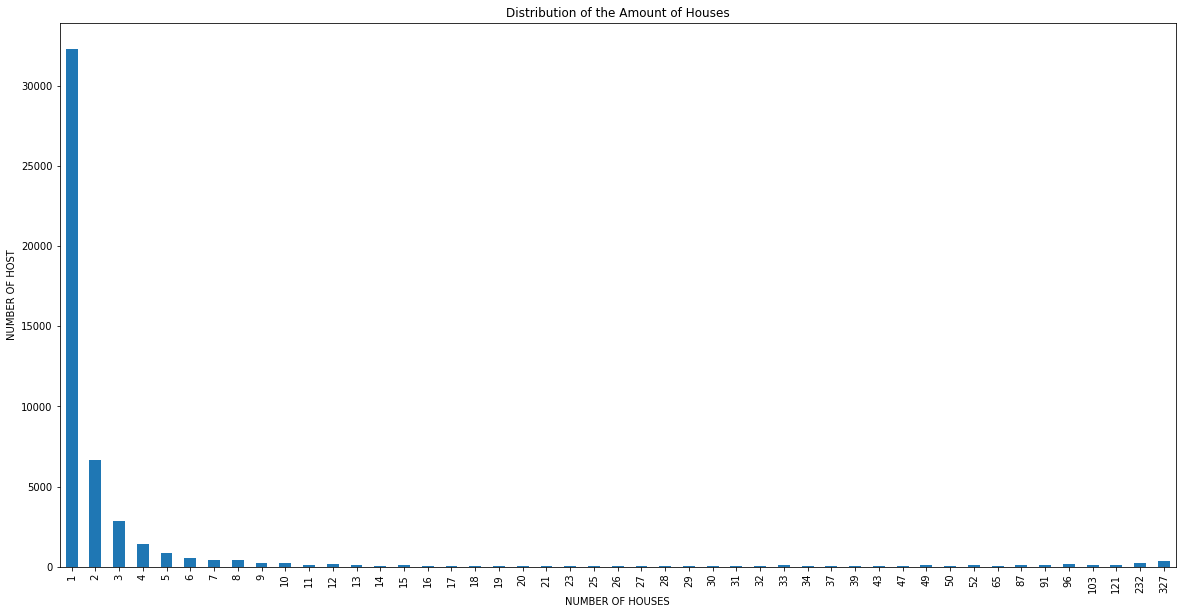

In [ ]:
df1=df.copy()
count_dist=df1.groupby(by="calculated_host_listings_count").count()
count_dist['id'].plot.bar(figsize=(20,10))
#y=count_dist.index
#x=count_dist['id']


#plt.plot.bar(x, y, color='g')
plt.xlabel("NUMBER OF HOUSES")
plt.ylabel("NUMBER OF HOST")
plt.title("Distribution of the Amount of Houses")





As we can see from the graph, most of the hosts (more than 30000) has just one house, and the amount of host owning more than one house is decreasing.

##Revenue Analysis



###**Creating a New 'Revenue' Column**

We will create a new column called 'Revenue', which will calculate the revenue of the host from that house in one year. 

In [ ]:
df['Revenue'] = df.rented_days * df.price 

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rented_days,Revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10,2250
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,171,15219
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,365,29200


###**Distribution of Revenue**

Now, we will examine the revenue distribution.

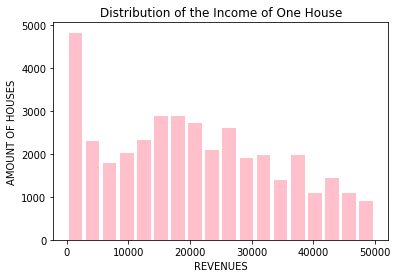

In [ ]:
plt.hist(df['Revenue'],bins=18,rwidth= 0.8, range=[0, 50000],align='mid',color='pink')
plt.xlabel("REVENUES")
plt.ylabel("AMOUNT OF HOUSES")
plt.title("Distribution of the Income of One House")

plt.show()



The amount of houses that bring higher income is less than the amount of houses that bring less. The total house number with revenue between 0 and 10000 is approximately 5000, while the houses which bring 50000 revenue is approximately 1000. 

###**Distribution of Total Revenues**

Some of the hosts have more than one house. We will calculate the total income distribution of the hosts. This income is coming from the sum of the revenues from each house that a host has.


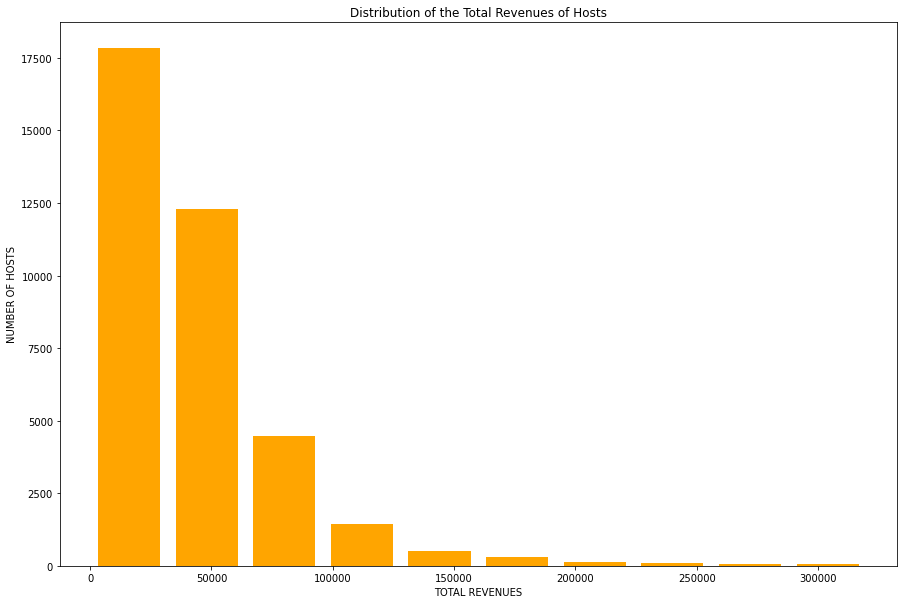

In [ ]:
df2=df.copy()

total_rev=df2.groupby(["host_id"])["Revenue"].sum()

df_rev = pd.DataFrame(total_rev)

plt.figure(figsize=(15,10))
plt.hist(total_rev,bins=10, range=[0, 320000],rwidth= 0.8,color='orange')
plt.xlabel("TOTAL REVENUES")
plt.ylabel("NUMBER OF HOSTS")
plt.title("Distribution of the Total Revenues of Hosts")


plt.show()




### **Grouping the Revenues**

We will categorize the revenues in order to examine how many of the hosts are gaining highly from their rented-houses.

We define our category list as:

* Between 0 and 10.000 dollars, extremely low income
* Between 10.000 and 30.000 dollars,  low income
*Between 30.000 and 80.000 dollars, normal  income
*Between 80.000 and 200.000 dollars, high income
*Between 200.000 and 340.000 dollars, extremely high income



In [ ]:
def categorize(Revenue):
   
    if 0<Revenue <= 10000:
        return "extremely low income"
    elif 10000<Revenue<= 30000:
        return "low income"
    elif 30000 <Revenue<= 80000:
        return "normal income"
    elif 80000<Revenue<= 200000:
        return "high income"
    elif 200000 <Revenue<= 340000:
        return "extremely high income"
    

 
df_rev["revenue_category"] = df_rev["Revenue"].apply(categorize)
df_rev.head(6)


,Revenue,revenue_category
host_id,,
2438,34675,normal income
2571,62244,normal income
2787,78502,normal income
2845,2250,extremely low income
2868,8640,extremely low income
2881,15080,low income


revenue_category
extremely high income      325
extremely low income      3749
high income               4017
low income               12629
normal income            15982
dtype: int64


Text(0.5, 1.0, 'categorization of the Income')

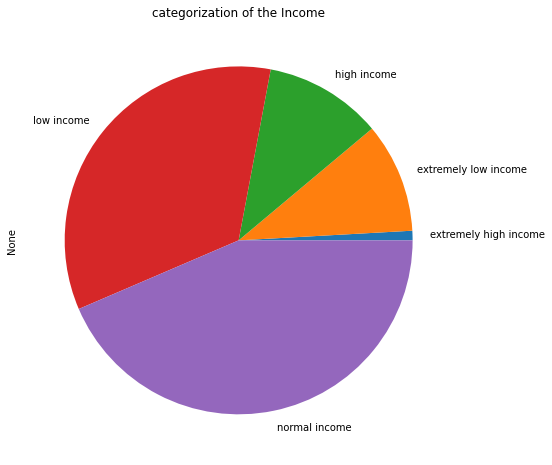

In [ ]:
a = df_rev.groupby('revenue_category').size()
print(a)
a.plot.pie(figsize=(8,8))
plt.title("categorization of the Income")

We can observe that the percentage of the hosts with low income is almost equal to the percentage of the hosts with normal income. The hosts which have extremely high income has a small percentage. This shows the rate of success of the hosts is not satisfactory.

## Analysis by Location


###**Revenues Based on Location**

As we calculated the revenues of the hosts, now we will observe the distribution of the revenues according to the areas in NYC. This helps us to understand which provinces bring more income than the others. Therefore, the results show if the hosts choose the province wisely or not.

Text(0.5, 1.0, 'Distribution of Revenue in Different Neighbourhoods')

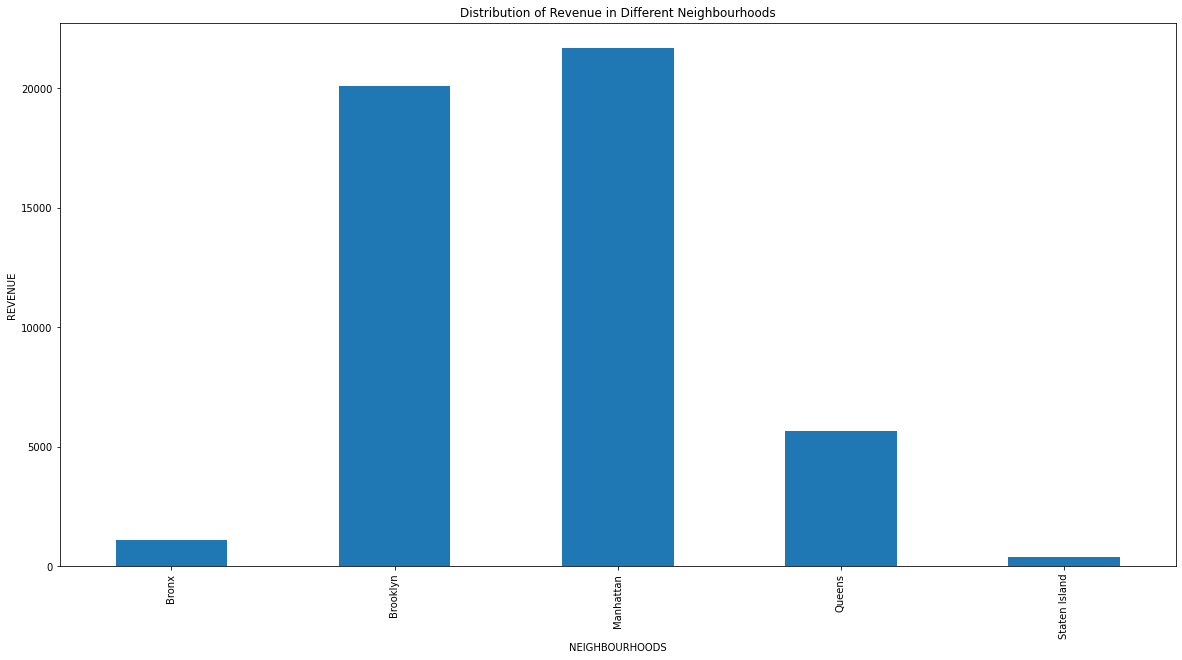

In [ ]:
df3=df.copy()
countt=df3.groupby(by="neighbourhood_group").count()
countt['Revenue'].plot.bar(figsize=(20,10))

plt.xlabel("NEIGHBOURHOODS")
plt.ylabel("REVENUE")
plt.title("Distribution of Revenue in Different Neighbourhoods")

It shows us that the area Brooklyn and Manhattan bring more income to the hosts than the areas Bronx, Queens and Staten Island. Clearly, the rate of success of the hosts is much higher in those who prefer to own houses in Brooklyn or Manhattan.

###**Number of Hosts vs Revenue**

Now, we want to analyze each provinces according to the number of hosts and their revenue. We expect that in Brooklyn and Manhattan, the number of the hosts with higher revenue is more than the other provinces.

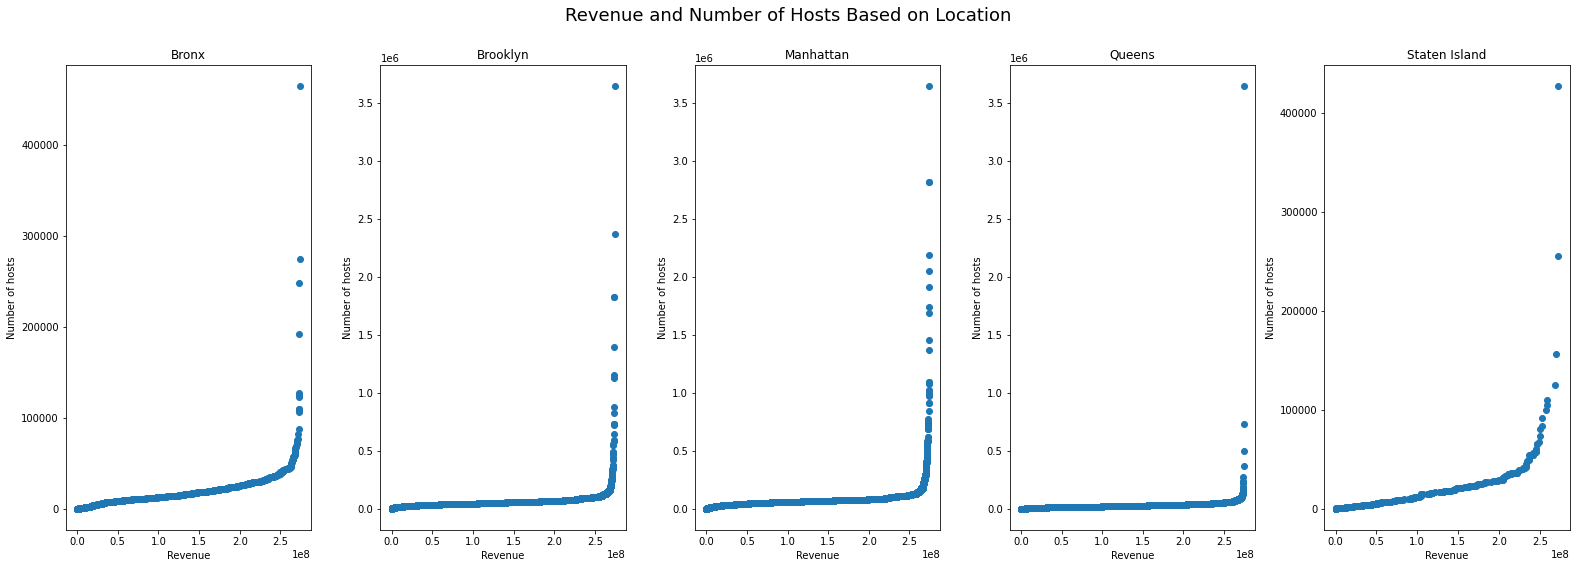

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(22,8), sharey=True)
fig.suptitle('Revenue and Number of Hosts Based on Location', fontsize=18)

plt.subplot(1,5,1)
plt.title('Bronx')
plt.xlabel("Revenue")
plt.ylabel("Number of hosts")
plt.scatter(sorted(df["host_id"][df['neighbourhood_group']=='Bronx']),sorted(df["Revenue"][df['neighbourhood_group']=='Bronx']))

plt.subplot(1,5,2)
plt.title('Brooklyn')
plt.scatter(sorted(df["host_id"][df['neighbourhood_group']=='Brooklyn']),sorted(df["Revenue"][df['neighbourhood_group']=='Brooklyn']))
plt.xlabel("Revenue")
plt.ylabel("Number of hosts")


plt.subplot(1,5,3)
plt.title('Manhattan')
plt.scatter(sorted(df["host_id"][df['neighbourhood_group']=='Manhattan']),sorted(df["Revenue"][df['neighbourhood_group']=='Manhattan']))
plt.xlabel("Revenue")
plt.ylabel("Number of hosts")


plt.subplot(1,5,4)
plt.title('Queens')
plt.scatter(sorted(df["host_id"][df['neighbourhood_group']=='Queens']),sorted(df["Revenue"][df['neighbourhood_group']=='Queens']))
plt.xlabel("Revenue")
plt.ylabel("Number of hosts")


plt.subplot(1,5,5)
plt.title('Staten Island')
plt.scatter(sorted(df["host_id"][df['neighbourhood_group']=='Staten Island']),sorted(df["Revenue"][df['neighbourhood_group']=='Staten Island']))
plt.xlabel("Revenue")
plt.ylabel("Number of hosts")


plt.tight_layout()
fig.tight_layout()
fig.subplots_adjust(top=0.88)

As we assumed, it is clearly seen that in Manhattan and Brooklyn, the income of the hosts are higher than the other areas.

###**Average Rented Days in Different Areas**

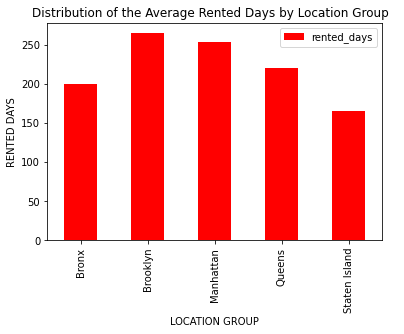

In [ ]:
df_copy2=df.copy()
b=df_copy1.groupby(['neighbourhood_group'])['rented_days'].mean()

df_b = pd.DataFrame(b) 
df_b.plot(kind='bar', color='red')


plt.xlabel("LOCATION GROUP")
plt.ylabel("RENTED DAYS")
plt.title("Distribution of the Average Rented Days by Location Group  ")
plt.show()


We can conclude that in Brooklyn and Manhattan, the rented days' average is higher than the other regions.

##Visualization of Airbnb Houses in HeatMap

We will visualize the distribution of houses in NYC.

In [ ]:
import folium
from folium.plugins import HeatMap
dfcopy= df.copy()
latitude= df["latitude"].mean()
longitude = df["longitude"].mean()
fmap=folium.Map
fmap= folium.Map([latitude, longitude],control_scale= True, zoom_start=12, tiles= "CartoDB dark_matter")
HeatMap(data= dfcopy[["latitude","longitude"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist(),radius= 10, max_zoom=12).add_to(fmap)
fmap

##NYC Museum Dataset

###**Distribution of Museums in NYC**

Museums are considered as a touristic place. We want to observe that if hosts are considering touristic places for house-renting. We will categorize the museum locations in order to see if the areas with more museums demand more price for renting or not.

In [ ]:
filename = "MUSEUM-PLS.csv"
df_museums = pd.read_csv(join(path_prefix, filename))

df_museums.head()

,latitude,longitude,URL,ADRESS1,ADDRESS2,CITY,ZIP
0,40.703816,-74.013756,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,Manhattan,"10,004"
1,40.615121,-74.063032,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,"10,305"
2,40.833853,-73.947298,http://www.artsandletters.org/,633 W. 155th St.,NaN,Manhattan,"10,032"
3,40.761625,-73.978103,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,Manhattan,"10,019"
4,40.699056,-74.039685,http://www.ellisisland.org/,Ellis Island,NaN,Manhattan,0


                  latitude  longitude  URL  ADRESS1  ADDRESS2  ZIP
CITY                                                              
Bronx                    8          8    8        8         2    8
Brooklyn                12         12   12       12         1   12
Jackson Heights          1          1    1        1         0    1
Long Island City         1          1    1        1         0    1
Manhattan               89         89   89       89         9   89
Queens                  10         10   10       10         3   10
Staten Island            9          9    9        9         0    9


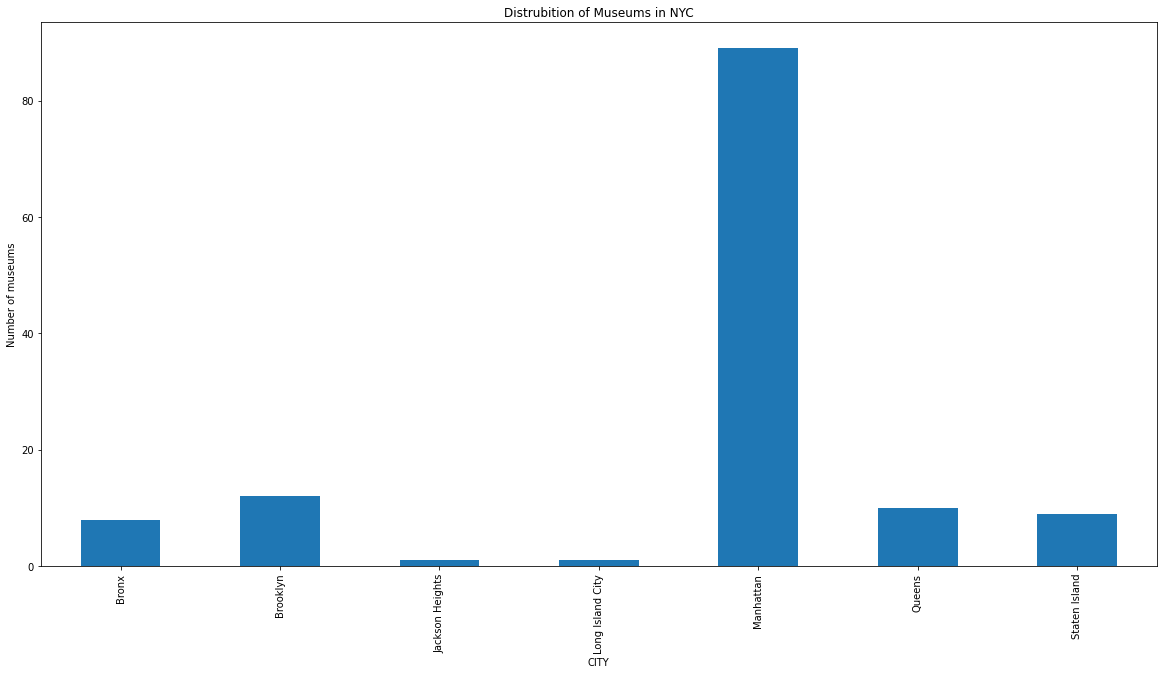

In [ ]:
df6=df_museums.copy()
a=df6.groupby(by="CITY").count()
a['latitude'].plot.bar(figsize=(20,10))
plt.ylabel("Number of museums")
plt.title("Distrubition of Museums in NYC")

print(a)

The histogram shows that the number of museums in Manhattan is the highest one among the provinces. We can conclude that this may be the reason why Manhattan has the highest prices, and more demand.

###**Visualization of Museums in NYC**


In [ ]:
import folium
from folium.plugins import HeatMap
dfcopy= df_museums.copy()
latitude= dfcopy["latitude"].mean()
longitude = dfcopy["longitude"].mean()
fmap=folium.Map
fmap= folium.Map([latitude, longitude],control_scale= True, zoom_start=12, tiles= "Stamen Watercolor")
HeatMap(data= dfcopy[["latitude","longitude"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist(),radius= 10, max_zoom=12).add_to(fmap)
fmap

#MACHINE LEARNING

##Knn Method


We will use Knn machine learning method to predict the "Revenue" values with using "price" and "neighbourhood_group" columns.

###Implementation

In [ ]:
X = df[["neighbourhood_group","price"]]
neighbour= X['neighbourhood_group'].map({'Bronx': 0, 'Brooklyn': 1,'Manhattan':2,'Staten Island':3,'Queens':4})
X = X.drop(['neighbourhood_group'],axis=1)
X['neighbourhood_group']=neighbour
y = df["Revenue"]
X.head()

,price,neighbourhood_group
0,149,1
1,225,2
2,150,2
3,89,1
4,80,2


###Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

###Evalution Criteria

Now, let's generate a set of values to be tested for the hyperparameter K. We're going to evaluate each model with a metric named accuracy score which is specialized metric for classification problems as here.

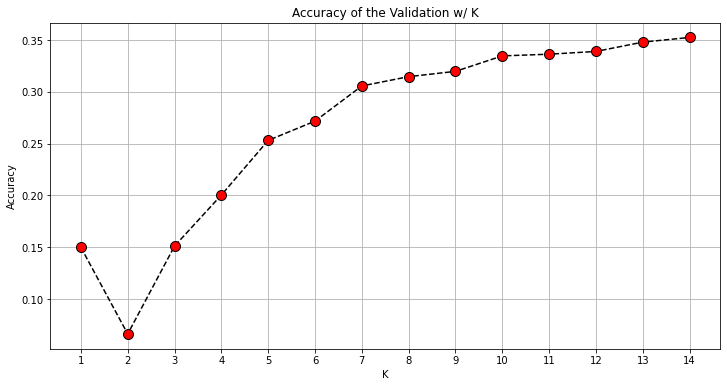

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

K_range = np.arange(1, 15)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

The figure above shows that we obtain the maximum accuracy score when K is set to 14.

Now, we can observe the overall performance of the developed model with respect to the reserved test dataset.

In [ ]:
# create a new model with current K
knn = KNeighborsClassifier(14, metric="euclidean")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
f"{accuracy_score(y_test, y_pred):.2f}"

'0.33'

We obtained a much lower test accuracy value compared to the validation score. This shows that there is no correlation between the prices of the houses and the revenue of the hosts.

##Regression Method

###Implementation

We will use multiple regression method to see if any correlation exists.




In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os.path import join

We will transform the neighbourhood information into the numeric values.

In [ ]:
def neighbour_to_number(neighbourhood_group):
  if neighbourhood_group == "Bronx":
    return "0"
  elif neighbourhood_group == "Brooklyn":
    return "1"
  elif neighbourhood_group == "Manhattan":
    return "2"
  elif neighbourhood_group == "Staten Island":
   return "3"  
  elif neighbourhood_group == "Queens":
   return "4"  

df["neighbour_in_numb"]=df["neighbourhood_group"].apply(neighbour_to_number)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rented_days,Revenue,neighbour_in_numb
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10,2250,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,171,15219,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,365,29200,2


We will create the linear regression model and observe the coefficients.

In [ ]:
features = ["price", "neighbour_in_numb"]
X = df[features].values  
y = df['Revenue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
price,193.780806
neighbour_in_numb,-1362.018397


The size of the coefficient for each independent variable gives the size of the effect that variable has on the revenue, and the sign on the coefficient (positive or negative) gives the direction of the effect. The coefficient tells how much the revenues is expected to increase according to the price and decrease accordingly to neighbourhood.

###Visualization of Linear Regression

In [ ]:
# extracting the input and output vectors
X = df["price"].values.reshape(-1,1)  # converting to column vector
y = df['Revenue'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# creating the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

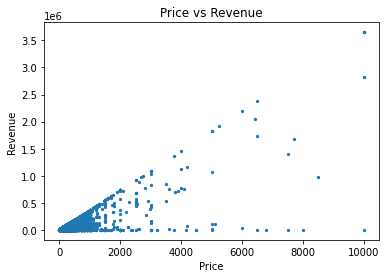

In [ ]:

df.plot.scatter(x="price", y="Revenue", s=5)  
plt.title("Price vs Revenue")  
plt.xlabel("Price")  
plt.ylabel("Revenue")  
plt.show()

In [ ]:
# intercept
b = model.intercept_
# slope
m = model.coef_

print(m, b, sep="\n")

[193.73374474]
6291.301572886536


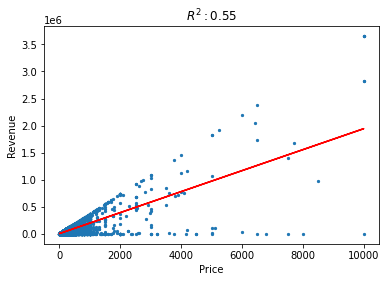

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)
# resulting regression line
rline = m[0]*X.flatten() + b

df.plot.scatter(x="price", y="Revenue", s=5)
plt.plot(X.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))  
plt.xlabel("Price")  
plt.ylabel("Revenue")  
plt.show()

##Results & Discussion

We observed that by using the Knn method, the correlation between price and revenue is low by %33. However, the linear regression method shows us a higher correlation. When the price of the houses increases the revenue of the hosts also increases. While using Linear Regression method, we easily extracted the outputs from the coefficients.

#CONCLUSION

Our aim was to examine the rate of success of the hosts based on room type choice, price, total revenues and location. We want to understand how and according to which factors the hosts make their decisions on house renting. This research is made to help people whose focus are to turn this renting house into business. For example, a person who decides to buy several houses in NYC to rent them, will want to make the highest profit. This analysis will guide them in terms of decision making based on location, price and room type etc.

For instance, they should prefer a house in Manhattan or Brooklyn and they can set higher prices in these locations because they are rented almost everyday. In addition, the museums in New York City are mostly located near Manhattan, where the revenue of host's is higher. 

Although, two methods we use for machine learning: Knn and Linear Regression gave different outputs about price - revenue correlation.

